In [ ]:
!pip install pandas
!pip install nltk
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

# Example: IMDb dataset
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]


In [9]:
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned'] = df['review'].apply(clean_text)


ModuleNotFoundError: No module named 'nltk'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned'])

# Target: assume 'positive' = 1, 'negative' = 0
y = df['sentiment'].map({'positive': 1, 'negative': 0})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8883
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



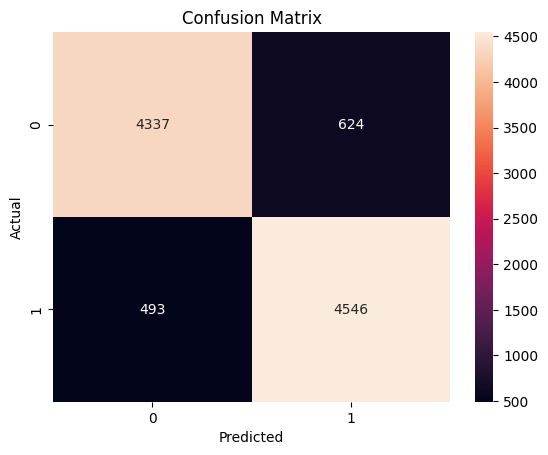

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Task 2: News Category Classification

In [ ]:
import pandas as pd

df = pd.read_csv('ag_news_train.csv')
print(df.columns)  # Check column names
print(df.head())

# Use the actual label column name
print(df['Class Index'].value_counts())

# Combine Title and Description into one feature
df['text'] = df['Title'] + " " + df['Description']


Index(['Class Index', 'Title', 'Description'], dtype='object')
   Class Index                                              Title  \
0            3                  Fears for T N pension after talks   
1            4  The Race is On: Second Private Team Sets Launc...   
2            4      Ky. Company Wins Grant to Study Peptides (AP)   
3            4      Prediction Unit Helps Forecast Wildfires (AP)   
4            4        Calif. Aims to Limit Farm-Related Smog (AP)   

                                         Description  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...  
Class Index
3    1900
4    1900
2    1900
1    1900
Name: count, dtype: int64


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = "".join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['cleaned'] = df['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned'])


In [ ]:
from sklearn.model_selection import train_test_split

y = df['Class Index']  # or df['Category'] if you mapped class names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("----------------------------------------------------------- Logistic Regression Prediction Accuracy Results -----------------------------------------------")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


----------------------------------------------------------- Logistic Regression Prediction Accuracy Results -----------------------------------------------
Logistic Regression Accuracy: 0.8883
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
print("----------------------------------------------------------- XGB Prediction Accuracy Results --------------------------------------------------------------")
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


----------------------------------------------------------- XGB Prediction Accuracy Results -----------------------------------------------
Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-3.0.3-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/149.9 MB 1.7 MB/s eta 0:01:29
   ---------------------------------------- 1.0/149.9 MB 2.3 MB/s eta 0:01:06
   ---------------------------------------- 1.6/149.9 MB 2.4 MB/s eta 0:01:03
    --------------------------------------- 2.1/149.9 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 2.6/149.9 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 3.1/149.9 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 3.7/149.9 MB 2.4 MB/s eta 0:01:01
   - -------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [14:45:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8591
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
!pip install datasets
!pip install transformers
!pip install evaluate
from datasets import load_dataset
dataset = load_dataset("squad")


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 4.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.3 MB 2.3 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.3 MB 3.0 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.3 MB 3.2 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.3 MB 3.4 MB/s eta 0:00:03
   ------------- -------------------------- 3.9/11.3 MB 3.5 MB/s eta 0:00:03
   ---------------- ----------------------- 4.7/11.3 MB 3.6 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.3 MB 3.6 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.3 MB 3.6 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.3 MB 3.6 MB/s eta 0:00:02
   -------------------------- ------------- 7.6/11.3 MB 3.6 MB/s eta 0:00:02
   --


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-distilled-squad")
model = AutoModelForQuestionAnswering.from_pretrained("distilbert-base-uncased-distilled-squad")
qa_pipeline = pipeline("question-answering", model=model, tokenizer=tokenizer)


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.8/216.1 MB 2.7 MB/s eta 0:01:21
   ---------------------------------------- 1.6/216.1 MB 3.0 MB/s eta 0:01:11
   ---------------------------------------- 2.4/216.1 MB 3.3 MB/s eta 0:01:06
    --------------------------------------- 3.1/216.1 MB 3.4 MB/s eta 0:01:03
    --------------------------------------- 3.9/216.1 MB 3.4 MB/s eta 0:01:02
    --------------------------------------- 4.5/216.1 MB 3.4 MB/s eta 0:01:02
    --------------------------------------- 5.2/216.1 MB 3.5 MB/s eta 0:01:00
   - -------------------------------------- 6.0/216.1 MB 3.6 MB/s eta 0:01:00
   - -------------------------------------- 6.8/216.1 MB 3.6 MB/s eta 0:00:59
   - -------------------------------------- 7.6/216.1 MB 3.6 MB/s eta 0:00:59



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ImportError: 
AutoModelForQuestionAnswering requires the PyTorch library but it was not found in your environment. Check out the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


In [ ]:
context = dataset['validation'][0]['context']
question = dataset['validation'][0]['question']

result = qa_pipeline({'context': context, 'question': question})
print("Q:", question)
print("A:", result['answer'])


In [ ]:
from evaluate import load

metric = load("squad")

# Just evaluate on the first 100 examples to save time
predictions = []
references = []

for example in dataset['validation'].select(range(100)):
    pred = qa_pipeline({'context': example['context'], 'question': example['question']})['answer']
    predictions.append({'id': example['id'], 'prediction_text': pred})
    references.append({'id': example['id'], 'answers': example['answers']})

result = metric.compute(predictions=predictions, references=references)
print("Exact Match:", result['exact_match'])
print("F1 Score:", result['f1'])


# Resume Screener

In [ ]:
!pip install sentence_transformers
!pip install -U sentence-transformers transformers torch


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Sample job description
job_description = """
We are seeking a Data Scientist with experience in Python, machine learning, and SQL.
Familiarity with TensorFlow or PyTorch is a plus. Strong analytical and communication skills required.
"""

# Sample resumes (normally, you'd extract these from text/pdf/docx files)
resumes = [
    {
        "name": "Alice",
        "text": "Experienced Python developer with strong skills in machine learning, SQL, and TensorFlow."
    },
    {
        "name": "Bob",
        "text": "Web developer skilled in JavaScript, HTML, CSS, and some Python."
    },
    {
        "name": "Charlie",
        "text": "Data Scientist with a background in Python, PyTorch, and deep learning."
    }
]

# Load model (MiniLM is fast & accurate)
model = SentenceTransformer('all-MiniLM-L6-v2')

# Embed job description
job_emb = model.encode([job_description])

# Embed resumes and calculate similarity
results = []
for resume in resumes:
    emb = model.encode([resume['text']])
    score = cosine_similarity(emb, job_emb)[0][0]
    results.append({
        'name': resume['name'],
        'match_score': round(score * 100, 2),
        'resume_excerpt': resume['text']
    })

# Sort results by match score
results = sorted(results, key=lambda x: x['match_score'], reverse=True)

# Display top matches
print("Top Matching Resumes:\n")
for res in results:
    print(f"Name: {res['name']}")
    print(f"Match Score: {res['match_score']}%")
    print(f"Excerpt: {res['resume_excerpt']}")
    print("-" * 60)


NameError: name 'LRScheduler' is not defined